In [1]:
import numpy as np
import pandas as pd
from DL_Lib import data_load, CouplingLayer, RealNVP, train, test, sample
import torch
from torch import nn, optim, distributions
from torch.nn import functional as F
from torchvision import transforms
from torchvision.utils import save_image
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from pylab import rcParams
import os
[weekday,_,_]=data_load()


C:\Users\ibeis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (3,4,5,6,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

rcParams['figure.figsize'] = 8, 8
plt.ion()
train_weekday, test_weekday=train_test_split(weekday,test_size=0.2,shuffle=True)

train_weekday=train_weekday.astype(np.float32)
test_weekday=test_weekday.astype(np.float32)

#train_weekday, test_weekday=torch.from_numpy(train_weekday), torch.from_numpy(test_weekday)
#train_weekend, test_weekend=torch.from_numpy(train_weekend), torch.from_numpy(test_weekend)

In [3]:
BATCH_SIZE = 128

EPOCHS = 100
INPUT_DIM = 2
OUTPUT_DIM = 2
HIDDEN_DIM = 256

N_COUPLE_LAYERS = 12
kwargs = {'num_workers': 1, 'pin_memory': True} if device == 'cuda' else {}
train_loader = torch.utils.data.DataLoader(train_weekday, batch_size=BATCH_SIZE, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_weekday, batch_size=BATCH_SIZE, shuffle=True, **kwargs)


In [4]:
mask = torch.from_numpy(np.array([0, 1]).astype(np.float32))
model = RealNVP(INPUT_DIM, OUTPUT_DIM, HIDDEN_DIM, mask, N_COUPLE_LAYERS)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
prior_z = distributions.MultivariateNormal(torch.zeros(2), torch.eye(2))


Train Epoch: 1 [0/65266 (0%)]	Loss: 0.021885
Train Epoch: 1 [6400/65266 (10%)]	Loss: -0.056892
Train Epoch: 1 [12800/65266 (20%)]	Loss: -0.070336
Train Epoch: 1 [19200/65266 (29%)]	Loss: -0.072557
Train Epoch: 1 [25600/65266 (39%)]	Loss: -0.073492
Train Epoch: 1 [32000/65266 (49%)]	Loss: -0.073059
Train Epoch: 1 [38400/65266 (59%)]	Loss: -0.075271
Train Epoch: 1 [44800/65266 (69%)]	Loss: -0.073604
Train Epoch: 1 [51200/65266 (78%)]	Loss: -0.074539
Train Epoch: 1 [57600/65266 (88%)]	Loss: -0.076198
Train Epoch: 1 [64000/65266 (98%)]	Loss: -0.074688
====> Epoch: 1 Average loss: -0.0683


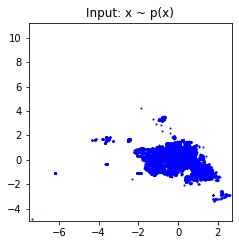

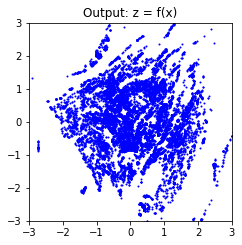

====> Test set loss: -0.0751


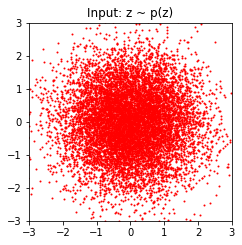

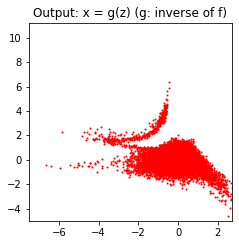

Train Epoch: 2 [0/65266 (0%)]	Loss: -0.075443
Train Epoch: 2 [6400/65266 (10%)]	Loss: -0.073539
Train Epoch: 2 [12800/65266 (20%)]	Loss: -0.074857
Train Epoch: 2 [19200/65266 (29%)]	Loss: -0.075470
Train Epoch: 2 [25600/65266 (39%)]	Loss: -0.075218
Train Epoch: 2 [32000/65266 (49%)]	Loss: -0.075311


KeyboardInterrupt: 

In [5]:
for epoch in range(1,EPOCHS+1):
    train(epoch,model, prior_z, train_loader, optimizer)
    test(epoch, model, prior_z, test_loader)
    sample(epoch, model, prior_z)

In [ ]:
model